# Part II - Prosper Loan Data
## by RANDRIANIRINA Ghislain Brice




## Investigation Overview


I will focus on the features that affect the most the Borrower's Annual Percentage Rate in the dataset.



## Dataset Overview

The Prosper loan dataset contain 113937 loans with 81 features where 60 are numerics and 21 non-numerics (categorical, date). The dataset can be found in the https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperloan.csv')

## Visualization 1

> This visualization show the correlation between numeric variables and highlight the high correlation between Borrower rate and Borrower APR, also between Monthly Loan Payment and Loan Original Amount.

In [3]:
# collect all numerical attributes
numeric_attr = []
for col in loan.columns:
    if loan[col].dtypes in ['float64', 'int64']:
        numeric_attr.append(col)

# collect all categorical attributes
categoric_attr = []
for col in loan.columns:
    if loan[col].dtypes not in ['float64', 'int64']:
        categoric_attr.append(col)

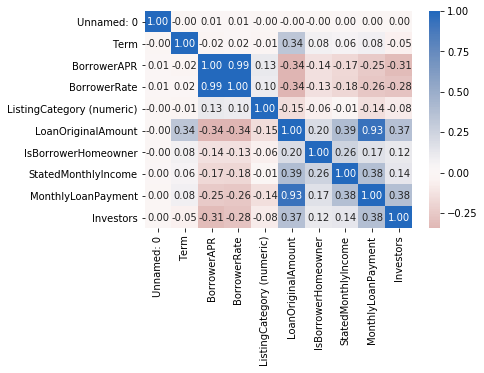

In [4]:
df = loan
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

## Visualization 2

> This visualization show a suprise that borrower having house do not have higher borrower rate.

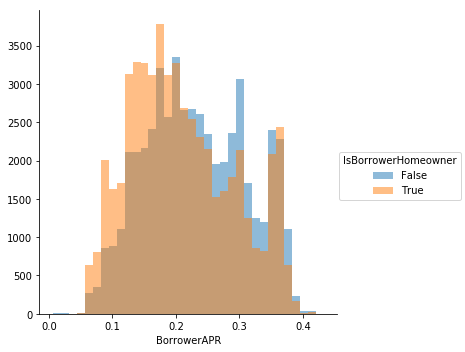

In [5]:

span = df['BorrowerAPR'].max() - df['BorrowerAPR'].min()

bin_edges = np.arange(df['BorrowerAPR'].min(), df['BorrowerAPR'].max()+3*span/100, 3*span/100)
g = sb.FacetGrid(data = df, hue = categoric_attr[-1], size = 5)
g.map(plt.hist, "BorrowerAPR", bins = bin_edges, alpha = 0.5)
g.add_legend()


## Visualization 3

> This visualization show that in general, more the amount of loan increase, lower is the borrower rate and borrower using 12 monthts Term borrow lower amount of loan.

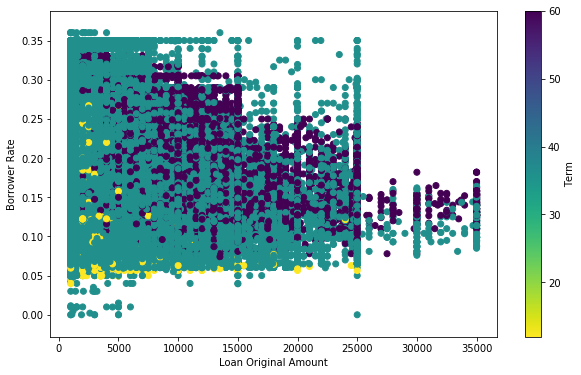

In [6]:
plt.figure(figsize =[10,6])
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'BorrowerRate', c = 'Term',
            cmap = 'viridis_r')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate')
plt.colorbar(label = 'Term');

## Visualization 4

> This visualization show that more than 95% of borrower pay loan monthly less than 1000.
> Also for borrower using 12 and 60 months Term, more the monthly loan payment increase, the borrower rate decrase.
> Last, the few borrowers having monthly loan payment more than around 1200 use only 12 month Term and they have low borrower rate.

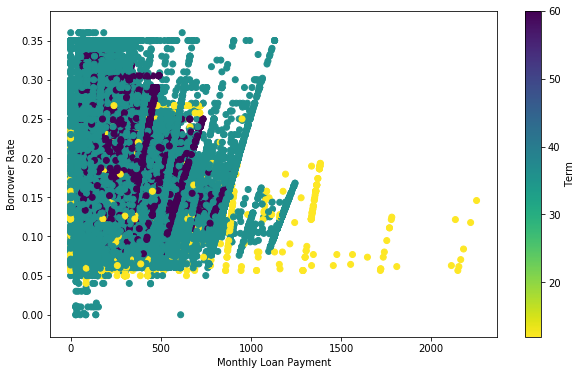

In [7]:

plt.figure(figsize =[10,6])
plt.scatter(data = df, x = 'MonthlyLoanPayment', y = 'BorrowerRate', c = 'Term',
            cmap = 'viridis_r')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Borrower Rate')
plt.colorbar(label = 'Term');

## Visualization 5
> This visualization show that 25000 is the highest Loan Original Amount for 12 months Term.
> Then, 35000 is the highest Loan Original Amount for 36 and 60 months Terms.
> Lower is the Term of payment, higher is the Monthly Loan Payment.

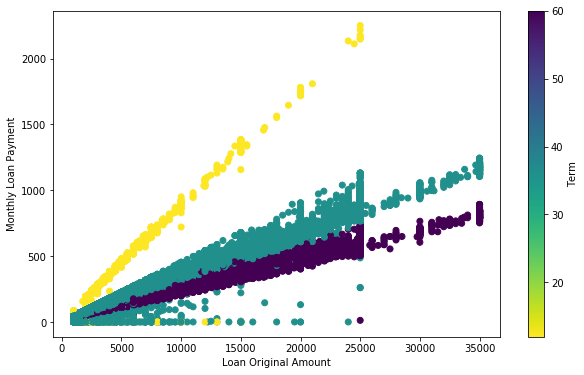

In [8]:
plt.figure(figsize =[10,6])
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', c = 'Term',
            cmap = 'viridis_r')
plt.xlabel('Loan Original Amount')
plt.ylabel('Monthly Loan Payment')
plt.colorbar(label = 'Term');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [9]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 532797 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.6/site-packages/jupyter_core/application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "/opt/conda/lib/python3.6/site-packages/nbconvert/nbconvertapp.py", line 507, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "/opt/conda/lib/python3.6/site-packages/nbcon

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
